In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('Downloads/tour_logs_train.csv'  # this is for training the data
              ,engine='python',
              encoding='latin1',
                on_bad_lines='skip', 
             quotechar='"',       
            skipinitialspace=True          
              )

test_df=pd.read_csv('Downloads/tour_logs_test_input - tour_logs_test_input.csv'
              ,engine='python',
              encoding='latin1',
                on_bad_lines='skip', 
             quotechar='"',       
            skipinitialspace=True          
              )

In [3]:
df.head()

,Gig_ID,Venue_ID,Show_DateTime,Day_of_Week,Volume_Level,Ticket_Price,Crowd_Size,Opener_Rating,Weather,Moon_Phase,Band_Outfit,Merch_Sales_Post_Show,Crowd_Energy
0,Gig_0000,V_Alpha,2024-03-07 21:00:00,3,5.0,52.93,464.0,2,Rainy,Waning Crescent,Leather,916,64.96
1,Gig_0001,V_Beta,2024-09-05 22:00:00,3,2.0,66.33,388.0,5,Clear,New Moon,Leather,1003,66.42
2,Gig_0002,V_Delta,2024-03-09 15:00:00,5,1.0,51.37,679.0,1,Rainy,Waning Crescent,Denim,720,42.58
3,Gig_0003,V_Beta,08/07/2024 08:00 AM,0,10.0,64.77,454.0,1,Rainy,New Moon,Leather,0,0.00
4,Gig_0004,V_Delta,2024-04-26 17:00:00,4,8.0,47.34,654.0,5,Cloudy,Full Moon,Spandex,950,67.55


In [4]:
df.describe()

,Day_of_Week,Volume_Level,Crowd_Size,Opener_Rating,Merch_Sales_Post_Show,Crowd_Energy
count,2000.000000,1819.000000,1960.000000,2000.00000,2000.000000,2000.000000
mean,3.006000,5.637163,610.836735,3.01700,797.040500,55.126035
std,2.024849,5.508995,1941.634319,1.40844,323.222699,47.384777
min,0.000000,-5.000000,-100.000000,1.00000,0.000000,-10.000000
25%,1.000000,3.000000,425.000000,2.00000,626.750000,43.150000
50%,3.000000,5.000000,530.000000,3.00000,825.000000,55.515000
75%,5.000000,8.000000,648.000000,4.00000,1019.000000,67.447500
max,6.000000,99.000000,50000.000000,5.00000,1529.000000,999.000000


In [5]:
print(df.columns)

Index(['Gig_ID', 'Venue_ID', 'Show_DateTime', 'Day_of_Week', 'Volume_Level',
       'Ticket_Price', 'Crowd_Size', 'Opener_Rating', 'Weather', 'Moon_Phase',
       'Band_Outfit', 'Merch_Sales_Post_Show', 'Crowd_Energy'],
      dtype='object')


In [6]:
def preprocess_prices(x):
    if pd.isna(x) or pd.isnull(x):
        return np.nan

    x = str(x).strip()

    if x.startswith('£'):
        return float(x.replace('£', '')) * 1.27

    elif x.startswith('€'):
        return float(x.replace('€', '')) * 1.09

    elif x.startswith('USD'):
        return float(x.replace('USD', '').strip())

    else:
        return np.nan


df['Ticket_Price']=df['Ticket_Price'].apply(preprocess_prices)# to apply the whole thing 

test_df['Ticket_Price']=test_df['Ticket_Price'].apply(preprocess_prices)

In [7]:
# cleaning the missing and -ve values 
df.columns = df.columns.str.strip()

if 'Volume_Level' in df.columns:
    df['Volume_Level'] = df['Volume_Level'].where(
        (df['Volume_Level'] >= 1) & (df['Volume_Level'] <= 11), #volume is between 1 and 11
        np.nan
    )
    df['Volume_Level'] = df['Volume_Level'].fillna(df['Volume_Level'].mean())

if 'Crowd_Size' in df.columns:
    df['Crowd_Size'] = df['Crowd_Size'].where(
        (df['Crowd_Size'] >= 0) & (df['Crowd_Size'] <= 800),#crowd is between 0to 800
        np.nan
    )
    df['Crowd_Size'] = df['Crowd_Size'].fillna(df['Crowd_Size'].mean())


else: 
    df['Crowd_Energy'] = df['Crowd_Energy'].where(
        (df['Crowd_Energy'] >= 0) & (df['Crowd_Energy'] <= 100),#energy is between 0to100
        np.nan
    )
    df['Crowd_Energy'] = df['Crowd_Energy'].fillna(df['Crowd_Energy'].mean())



test_df.columns = test_df.columns.str.strip()

if 'Volume_Level' in test_df.columns:
    test_df['Volume_Level'] = test_df['Volume_Level'].where(
        (test_df['Volume_Level'] >= 1) & (test_df['Volume_Level'] <= 11), #volume is between 1 and 11
        np.nan
    )
    test_df['Volume_Level'] = test_df['Volume_Level'].fillna(test_df['Volume_Level'].mean())

if 'Crowd_Size' in df.columns:
    test_df['Crowd_Size'] = test_df['Crowd_Size'].where(
        (test_df['Crowd_Size'] >= 0) & (test_df['Crowd_Size'] <= 800),#crowd is between 0to 800
        np.nan
    )
    test_df['Crowd_Size'] = test_df['Crowd_Size'].fillna(test_df['Crowd_Size'].mean())






In [8]:
#clean the date 
for datas in [df, test_df]:
    datas['Show_DateTime'] = pd.to_datetime(datas['Show_DateTime'], errors='coerce')
    datas['day_of_week'] = datas['Show_DateTime'].dt.dayofweek
    datas['month'] = datas['Show_DateTime'].dt.month
    datas['is_weekend'] = datas['day_of_week'].isin([5,6]).astype(int)
    df['Hour'] = df['Show_DateTime'].dt.hour






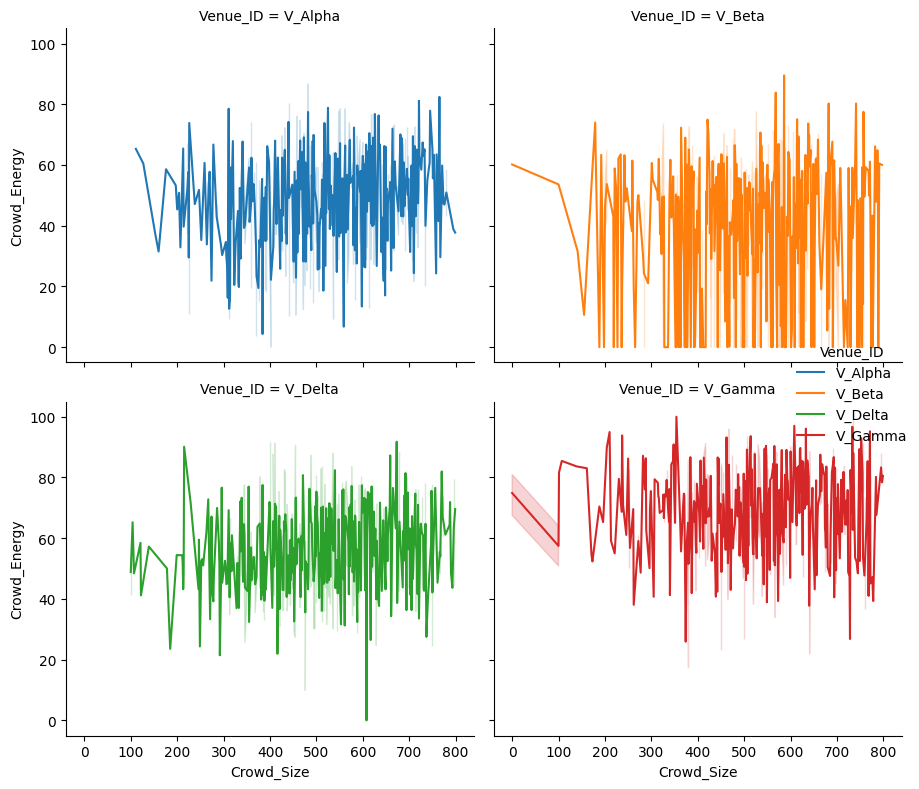

In [9]:
#check the hypothesis
df=df[(df['Crowd_Size'] >= 0) & (df['Crowd_Size'] <= 800) &
    (df['Crowd_Energy'] >= 0) & (df['Crowd_Energy'] <= 100)
]
g=sns.relplot(
    data=df,
    x='Crowd_Size' ,
    y='Crowd_Energy' ,   
     col='Venue_ID',     
    hue='Venue_ID',     
    col_wrap=2,          
    height=4,
    kind='line',
)
g.set_axis_labels('Crowd_Size','Crowd_Energy')
plt.tight_layout()
plt.show()

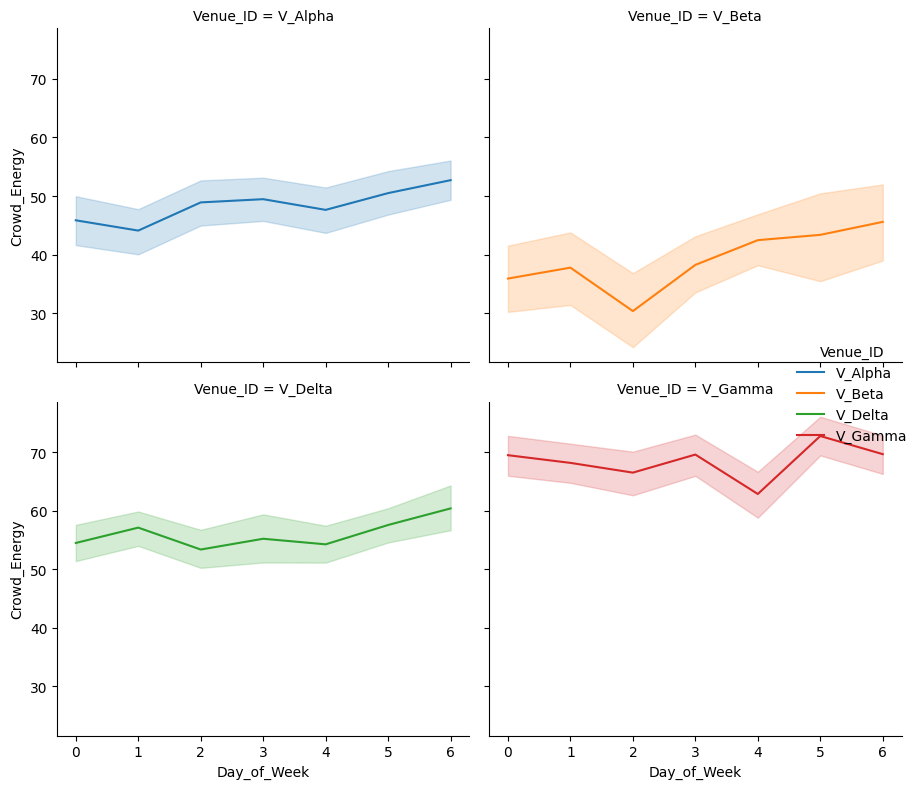

In [10]:
#check the hypothesis whether tuesday is better or weekands are better

g=sns.relplot(
    data=df,
    x='Day_of_Week',
    y='Crowd_Energy',   
     col='Venue_ID',     
    hue='Venue_ID',     
    col_wrap=2,          
    height=4,
    kind='line',
)
g.set_axis_labels('Day_of_Week','Crowd_Energy')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

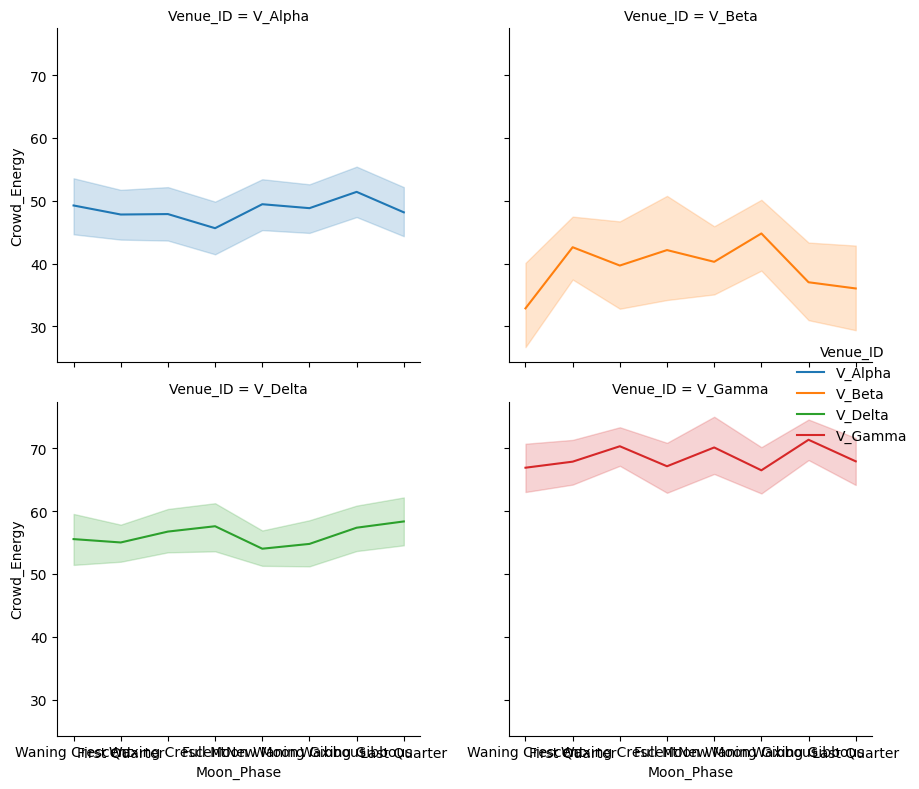

In [11]:
#check the hypothesis whether full moon is actually lucky 
plt.figure(figsize=(8,6))
g=sns.relplot(
    data=df,
    x='Moon_Phase',
    y='Crowd_Energy',   
     col='Venue_ID',     
    hue='Venue_ID',     
    col_wrap=2,          
    height=4,
    kind='line',
)
g.set_axis_labels('Moon_Phase','Crowd_Energy')

plt.tight_layout()
plt.show()

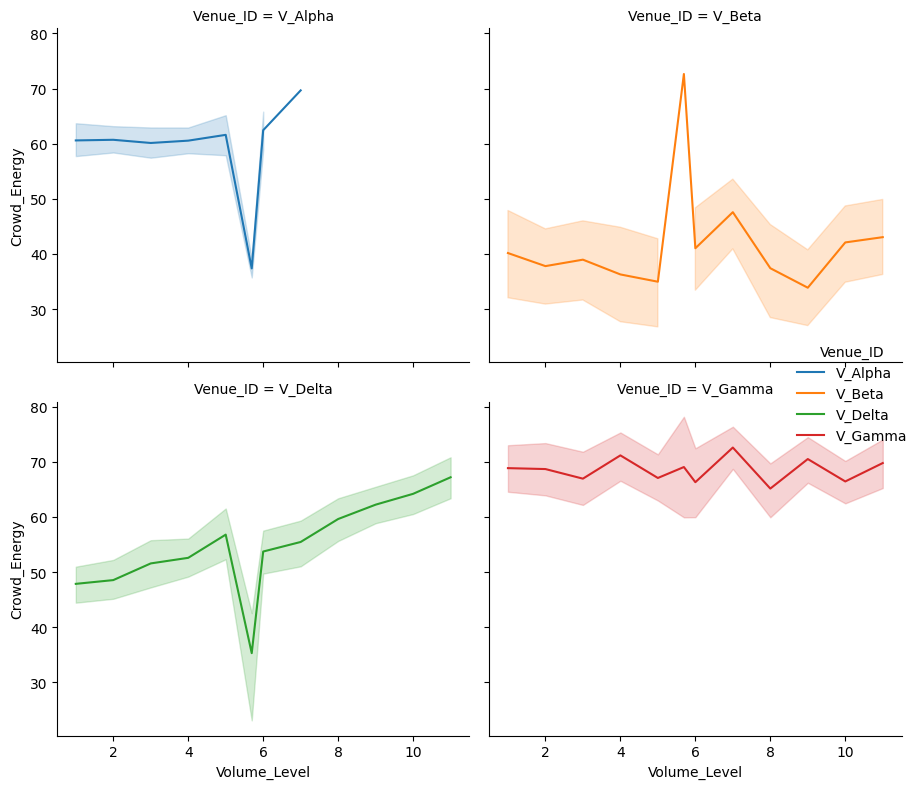

In [12]:
g = sns.relplot(
    data=df,
    x='Volume_Level',
    y='Crowd_Energy',
    col='Venue_ID',
    hue='Venue_ID',
    col_wrap=2,
    height=4,
    kind='line'
)

g.set_axis_labels('Volume_Level', 'Crowd_Energy')

plt.tight_layout()
plt.show()


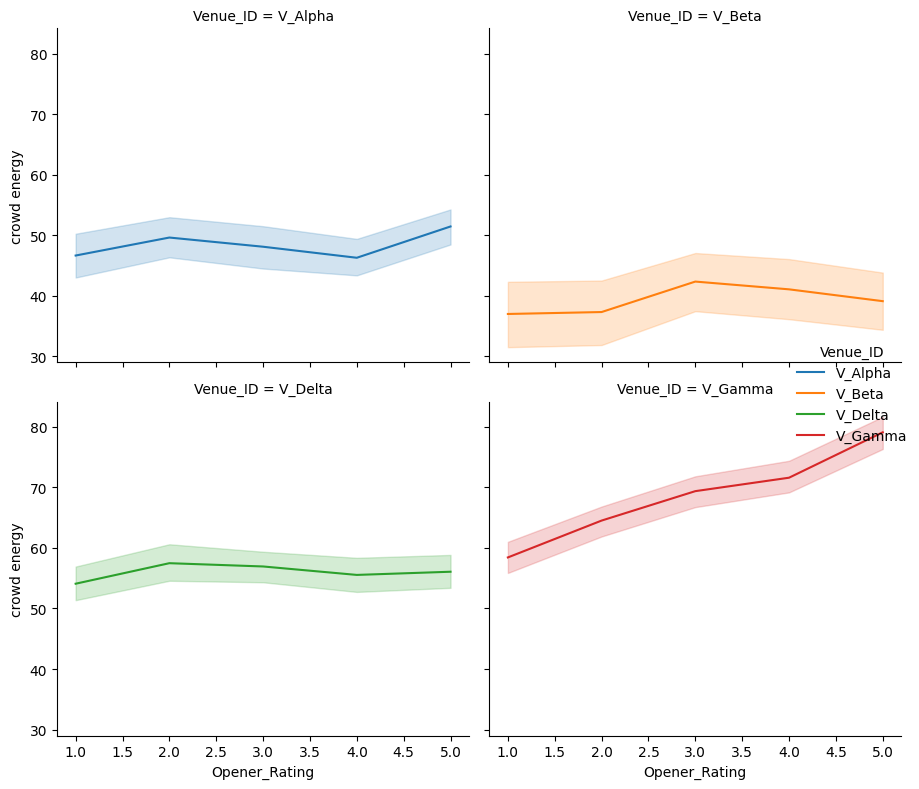

In [13]:
#check the hypothesis



g=sns.relplot(
    data=df,
    x='Opener_Rating',
    y='Crowd_Energy',   
     col='Venue_ID',     
    hue='Venue_ID',     
    col_wrap=2,          
    height=4,
    kind='line',
)
g.set_axis_labels('Opener_Rating','crowd energy')
plt.tight_layout()
plt.show()


In [14]:


X_train=df[['Volume_Level','Crowd_Size','Day_of_Week','Ticket_Price']]
y_train=df['Crowd_Energy']

X_test=test_df[['Volume_Level','Crowd_Size','Day_of_Week','Ticket_Price']]
from sklearn.model_selection import KFold,GridSearchCV

kf=KFold(
    n_splits=5,
    shuffle=True,
    random_state=42   
)


rf=RandomForestRegressor()

param_grid={
'n_estimators':[50,100,150],
    'max_depth':[None,10,20],
    'min_samples_leaf':[2,5],
    'min_samples_leaf':[1,2,5],
    'max_features':['auto','sqrt','log2']
}

grid_search= GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)


grid_search.fit(X_train,y_train)
print("Best RMSE:", -grid_search.best_score_)
print("Best params:", grid_search.best_params_)



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best RMSE: -0.027547095471874988
Best params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 150}


In [15]:
regressor=RandomForestRegressor(n_estimators=150,random_state=42)

regressor.fit(X_train,y_train)

y_predict=regressor.predict(X_test)






In [16]:
prediction=pd.DataFrame(
    {
    'Gig_ID':df['Gig_ID'][:500],
    'Crowd_Energy':y_predict
    }
                       )



In [17]:
prediction.to_csv(index=False)

'Gig_ID,Crowd_Energy\nGig_0000,60.4484\nGig_0001,52.91314777777787\nGig_0002,50.93620000000004\nGig_0003,48.37468333333343\nGig_0004,37.99386666666668\nGig_0005,49.1931333333333\nGig_0006,28.518533333333355\nGig_0007,53.473799999999926\nGig_0008,66.12446666666663\nGig_0009,42.620933333333284\nGig_0010,61.439966666666535\nGig_0011,29.889733333333286\nGig_0012,59.45739999999991\nGig_0013,32.83420000000001\nGig_0014,33.70868000000003\nGig_0015,63.006399999999985\nGig_0016,57.145842857142874\nGig_0017,53.57797777777769\nGig_0018,41.605444444444466\nGig_0019,45.342666666666716\nGig_0020,56.67257045454554\nGig_0021,49.17353333333331\nGig_0022,54.87266666666664\nGig_0023,56.281666666666595\nGig_0024,46.625479999999946\nGig_0025,61.68585333333333\nGig_0026,45.81419999999993\nGig_0027,66.21306666666665\nGig_0028,43.40943333333332\nGig_0029,54.19193333333326\nGig_0030,72.24593333333321\nGig_0031,54.07371190476183\nGig_0032,69.68943722222214\nGig_0033,60.72966666666664\nGig_0034,69.92713333333323

In [18]:
#assumption
venue_capacity=800
fixed_cost=5000
variable_cost=8

accuratemodel=grid_search.best_estimator_#calculated earlier

# optimization    
#profit=revenue-cost
#revenue=attendes*ticketprice
#cost=fixed cost+variable cost * attendes

ticketprice=np.arange(30,200,10)


features =['Volume_Level','Crowd_Size','Day_of_Week','Ticket_Price']

VGamma=df[df['Venue_ID']=='V_Gamma'].copy()


profit_=[]#an empty array

for price in ticketprice:
    VGamma['Ticket_Price']=price
    
    energy=accuratemodel.predict(VGamma[features]).mean()

    attendes=venue_capacity*(energy/100)
    
    
    cost=5000+8*attendes
    revenue=attendes*price
    profit=(revenue-cost)


    profit_.append({ 
         'Ticket_Price':price,
         'predicted_energy_':energy,
         'Profit':profit
        })


profit_df=pd.DataFrame(profit_)



In [19]:
profit_df.loc[profit_df['Profit'].idxmax()]

Ticket_Price           190.000000
predicted_energy_       57.218289
Profit               78309.828126
Name: 16, dtype: float64

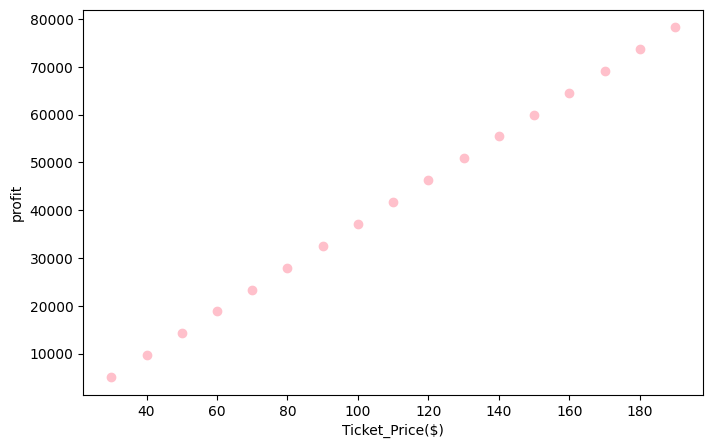

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(profit_df['Ticket_Price'],profit_df['Profit'],c='pink',)
plt.xlabel('Ticket_Price($)')
plt.ylabel('profit')
plt.show()